In [38]:
from pathlib import Path
from pandas import read_csv

TRAINING_DATASET_PATH = Path("../data/train_tweets.csv")
TEST_DATASET_PATH = Path("../data/test_tweets.csv")

TRAIN_DATA = read_csv(TRAINING_DATASET_PATH, sep=",", index_col=0)
TEST_DATASET_PATH = read_csv(TEST_DATASET_PATH, sep=",", index_col=0)

In [39]:
TRAIN_DATA.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [40]:
TRAIN_DATA.isnull().sum(axis=0)

keyword       61
location    2533
text           0
target         0
dtype: int64

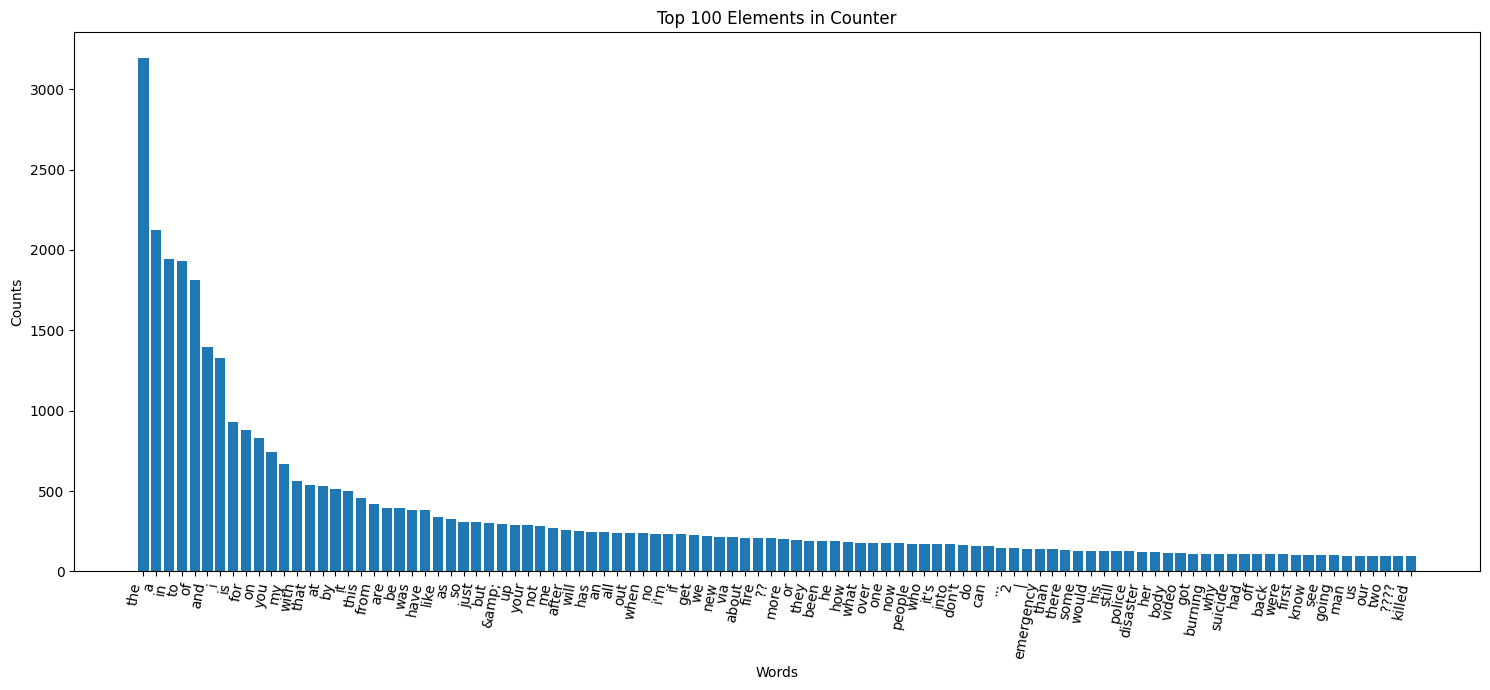

In [41]:
from collections import Counter
import matplotlib.pyplot as plt

all_text = " ".join([i.lower() for i in TRAIN_DATA["text"]])
words = all_text.split(" ")
occs = Counter(words)
del occs[" "]
del occs["-"]
del occs[""]
top_100_elements = occs.most_common(100)
elements, counts = zip(*top_100_elements)
plt.figure(figsize=(15, 7))
plt.bar(elements, counts)
plt.xticks(rotation=80, ha="right")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.title("Top 100 Elements in Counter")
plt.tight_layout()

plt.show()